# 0. Import Package and Load Data 

In [1]:
import numpy as np 
import pandas as pd 
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd
import matplotlib.font_manager as fm
import folium
from IPython.display import IFrame
import json
warnings.filterwarnings("ignore")
fm.get_fontconfig_fonts()
font = fm.FontProperties(fname='../input/font-list/NanumBarunGothic.ttf')
plt.style.use('ggplot')
matplotlib.rc('font',family=font.get_name())
%matplotlib inline

In [2]:
time_df_list = []
age_df_list = []
for x in [201902,201903,201904,201905,202002,202003,202004,202005]:
    time_df_list.append('../input/sk-pop-flow/SK_유동인구/4_FLOW_TIME_'+str(x)+'.CSV')
    age_df_list.append('../input/sk-pop-flow/SK_유동인구/4_FLOW_AGE_'+str(x)+'.CSV')
time_df = pd.concat([pd.read_csv(path,sep='|') for path in time_df_list])
age_df = pd.concat([pd.read_csv(path,sep='|') for path in age_df_list])
    
        

In [3]:
print('time_df shape:',time_df.shape)
print('age_df shape:',age_df.shape)

time_df shape: (16629, 28)
age_df shape: (16629, 34)


In [4]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 0 to 2138
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STD_YM    16629 non-null  int64  
 1   STD_YMD   16629 non-null  int64  
 2   HDONG_CD  16629 non-null  int64  
 3   HDONG_NM  16629 non-null  object 
 4   TMST_00   16629 non-null  float64
 5   TMST_01   16629 non-null  float64
 6   TMST_02   16629 non-null  float64
 7   TMST_03   16629 non-null  float64
 8   TMST_04   16629 non-null  float64
 9   TMST_05   16629 non-null  float64
 10  TMST_06   16629 non-null  float64
 11  TMST_07   16629 non-null  float64
 12  TMST_08   16629 non-null  float64
 13  TMST_09   16629 non-null  float64
 14  TMST_10   16629 non-null  float64
 15  TMST_11   16629 non-null  float64
 16  TMST_12   16629 non-null  float64
 17  TMST_13   16629 non-null  float64
 18  TMST_14   16629 non-null  float64
 19  TMST_15   16629 non-null  float64
 20  TMST_16   16629 non-null  flo

In [5]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 0 to 2138
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STD_YM                  16629 non-null  int64  
 1   STD_YMD                 16629 non-null  int64  
 2   HDONG_CD                16629 non-null  int64  
 3   HDONG_NM                16629 non-null  object 
 4   MAN_FLOW_POP_CNT_0004   16629 non-null  float64
 5   MAN_FLOW_POP_CNT_0509   16629 non-null  float64
 6   MAN_FLOW_POP_CNT_1014   16629 non-null  float64
 7   MAN_FLOW_POP_CNT_1519   16629 non-null  float64
 8   MAN_FLOW_POP_CNT_2024   16629 non-null  float64
 9   MAN_FLOW_POP_CNT_2529   16629 non-null  float64
 10  MAN_FLOW_POP_CNT_3034   16629 non-null  float64
 11  MAN_FLOW_POP_CNT_3539   16629 non-null  float64
 12  MAN_FLOW_POP_CNT_4044   16629 non-null  float64
 13  MAN_FLOW_POP_CNT_4549   16629 non-null  float64
 14  MAN_FLOW_POP_CNT_5054   16629 non-null 

In [6]:
print('time_df Has 0 value in columns:',time_df.columns[time_df.min()==0].tolist()) 
print('age_df Has 0 value in columns:',age_df.columns[age_df.min()==0].tolist())

time_df Has 0 value in columns: []
age_df Has 0 value in columns: ['MAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0004']


In [7]:
print('00~04 male mean pop flow:',age_df.MAN_FLOW_POP_CNT_0004.mean())
print('00~04 female mean pop flow:',age_df.WMAN_FLOW_POP_CNT_0004.mean())
# SK제공 유동인구데이터 (SK텔레콤 가입자 기준 --> 00~04 영유아 집계 X)

00~04 male mean pop flow: 0.25103012808948455
00~04 female mean pop flow: 0.09531601419207328


In [8]:
time_df.reset_index(drop=True,inplace=True)
age_df.reset_index(drop=True,inplace=True)

# 1.  서울(중구 노원구)/대구(수성구) 월별 유동인구 추이

In [9]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (15,15)

geo_meta = gpd.read_file('../input/sk-pop-flow/SK_유동인구/4_.SHP')
geo_meta.head()

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
0,2020,2726067000,고산1동,27,대구광역시,27260,수성구,8881312.38,17757.54,128.69963062806,35.8117467030855,"POLYGON ((1110163.050 1760631.159, 1110159.980..."
1,2020,2726068000,고산2동,27,대구광역시,27260,수성구,24523329.28,25763.81,128.677147073408,35.838758403345,"POLYGON ((1108750.463 1760472.331, 1108750.254..."
2,2020,2726069000,고산3동,27,대구광역시,27260,수성구,5315712.45,11274.68,128.714043831276,35.8490479398919,"POLYGON ((1110796.393 1761790.272, 1110768.063..."
3,2020,2726064000,두산동,27,대구광역시,27260,수성구,1966650.15,7777.10,128.620832776346,35.8285656536299,"POLYGON ((1101901.259 1759682.396, 1101895.505..."
4,2020,2726055000,만촌1동,27,대구광역시,27260,수성구,2830625.94,8778.85,128.649513200936,35.8706818518603,"POLYGON ((1104959.292 1764030.763, 1104950.336..."


In [10]:
geo_meta.SGNG_NM.unique()

array(['수성구', '중구', '노원구'], dtype=object)

In [11]:
geo_meta[:35].SIDO_NM.unique() # index 0 ~34 : 대구    35 ~ 68 : 서울

array(['대구광역시'], dtype=object)

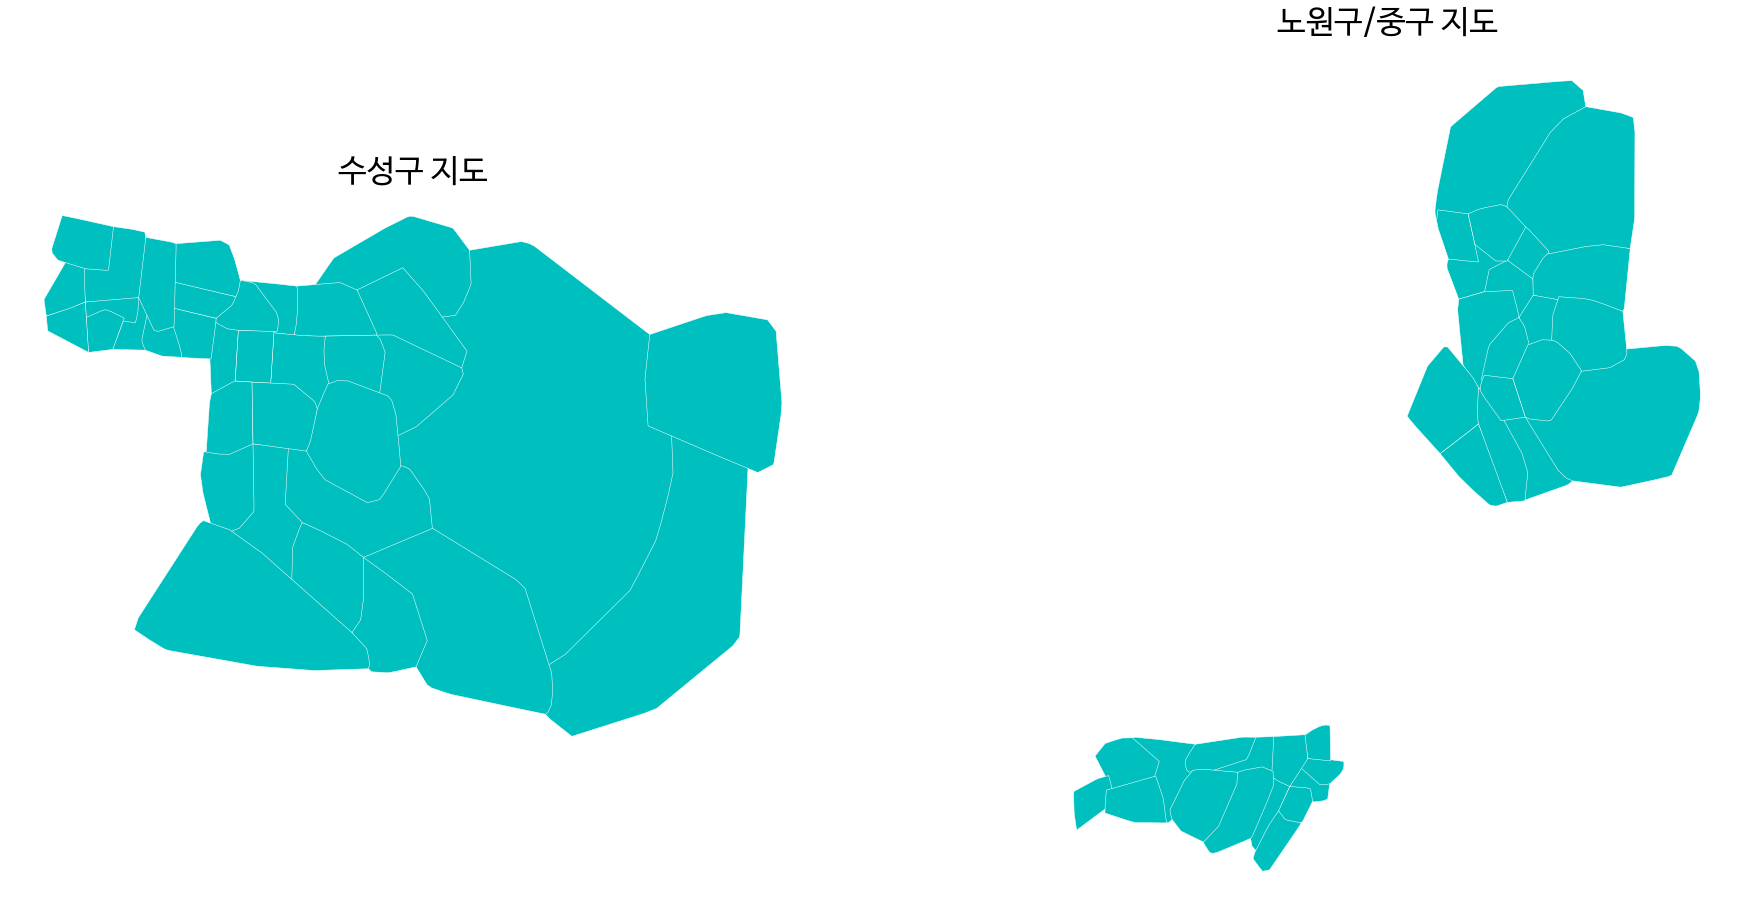

In [12]:
fig,ax = plt.subplots(1,2,figsize=(32,16))
geo_meta[:35].convex_hull.plot(color='c',edgecolor='w',ax=ax[0])
ax[0].set_title('수성구 지도',fontproperties=font,size=32)
ax[0].set_axis_off()
ax[1] = geo_meta[35:].convex_hull.plot(color='c',edgecolor='w',ax=ax[1])
ax[1].set_title('노원구/중구 지도',fontproperties=font,size=32)
ax[1].set_axis_off()

plt.show()

In [13]:
geo_meta[['X_COORD','Y_COORD']]=geo_meta[['X_COORD','Y_COORD']].apply(pd.to_numeric)
xy_loc=geo_meta.groupby('SGNG_NM').mean()[['X_COORD','Y_COORD']]

In [14]:
time_df['dayflow']=time_df.loc[:,'TMST_00':'TMST_23'].sum(axis=1)

In [51]:
geo_json = '../input/seoulgeo/seoul-dong.geojson'


In [25]:
time_df['date']=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')

In [45]:
seoul_dong_name=geo_meta[geo_meta.SIDO_NM=='서울특별시'].HDONG_NM.unique()
daegu_dong_name=geo_meta[geo_meta.SIDO_NM=='대구광역시'].HDONG_NM.unique()

In [132]:
time_df[time_df.HDONG_NM.isin(seoul_dong_name)]

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,dayflow,date
0,201902,20190201,1114052000,소공동,1496.35,1022.83,706.51,547.77,1673.02,3561.05,...,9317.64,15029.74,14135.83,9074.02,6032.26,6047.05,4806.65,2956.11,242230.67,2019-02-01
1,201902,20190201,1114054000,회현동,1692.37,1117.26,839.57,653.41,1920.52,4687.95,...,12527.29,21454.63,18214.50,11914.26,9800.64,9341.24,6884.91,4034.56,313074.90,2019-02-01
2,201902,20190201,1114055000,명동,2226.91,1726.10,1145.43,894.97,2513.32,5268.51,...,14434.56,25855.14,23107.23,13460.05,9797.40,8719.30,7203.45,4845.48,383161.87,2019-02-01
3,201902,20190201,1114057000,필동,698.73,440.70,385.99,275.64,497.41,1990.42,...,6205.74,13277.25,12101.51,5698.58,4464.46,4088.53,3385.14,1746.28,142224.16,2019-02-01
4,201902,20190201,1114058000,장충동,768.34,447.23,429.90,349.46,507.74,1310.67,...,3656.54,6841.98,5810.71,4463.99,2807.25,2626.12,2415.41,1398.94,85446.95,2019-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16589,202005,20200531,1135067000,상계5동,731.56,522.67,391.67,290.13,236.34,286.97,...,2204.31,2160.68,2164.07,1974.25,1842.94,1726.46,1515.64,1194.15,33352.35,2020-05-31
16590,202005,20200531,1135069500,상계6.7동,3823.44,2798.32,1993.55,2089.98,1096.29,1612.62,...,11663.93,11472.28,10954.59,9737.63,9234.05,8483.53,6767.56,4579.42,173971.96,2020-05-31
16591,202005,20200531,1135070000,상계8동,615.53,345.98,238.38,191.78,159.31,296.16,...,2888.10,2938.71,2648.09,2380.85,2277.38,2012.98,1498.08,1030.97,39121.76,2020-05-31
16592,202005,20200531,1135071000,상계9동,507.09,310.42,202.52,162.28,145.03,183.59,...,1635.17,1625.26,1552.04,1318.51,1180.39,989.83,835.64,564.88,21696.93,2020-05-31


In [137]:
time_df['SI_NM'] = time_df.HDONG_NM.isin(seoul_dong_name)
time_df['SI_NM']=time_df['SI_NM'].replace({True:'서울',False:'대구'})
time_df.sample(10)

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,dayflow,date,SI_NM
16405,202005,20200528,2726056100,만촌3동,685.74,750.16,610.52,342.17,268.95,371.75,...,2214.98,2656.32,2368.57,1906.68,1665.79,1554.68,1065.26,35721.82,2020-05-28,대구
3306,201903,20190320,2726065200,지산2동,458.81,286.58,87.06,140.34,143.64,257.28,...,2749.73,2933.62,2258.56,1822.04,1746.82,1170.52,730.66,33821.37,2019-03-20,대구
3865,201903,20190329,1114054000,회현동,1821.08,1236.14,892.45,722.73,1914.51,5135.08,...,24786.49,26549.89,14941.46,12001.46,11402.28,9549.48,5009.61,357181.74,2019-03-29,서울
2477,201903,20190308,2726065100,지산1동,877.53,751.70,484.85,405.63,381.61,579.74,...,5877.57,6428.63,5168.36,4230.52,4041.26,3237.12,2041.62,76317.36,2019-03-08,대구
14733,202005,20200504,2711056500,성내1동,1394.17,1198.34,1032.12,908.71,912.81,1162.85,...,8545.41,9442.90,7076.81,4548.63,3651.28,3124.63,2303.51,124221.20,2020-05-04,대구
11810,202003,20200323,1114065000,신당5동,328.19,174.30,153.19,131.18,162.70,322.95,...,1966.31,2664.40,2097.75,1554.91,1169.12,1030.44,737.79,30559.65,2020-03-23,서울
12685,202004,20200404,2726061000,중동,945.66,765.85,631.68,550.28,469.40,542.85,...,3610.64,3435.51,2765.47,2419.53,1838.40,1563.40,1166.33,49474.51,2020-04-04,대구
3696,201903,20190326,2711059500,대신동,299.22,231.70,174.93,165.57,213.14,621.19,...,3660.44,3462.41,2124.78,1896.62,1625.71,1139.41,512.87,55666.24,2019-03-26,대구
11013,202003,20200311,2711066000,남산3동,99.91,87.78,71.91,52.59,47.67,71.47,...,576.78,765.30,510.63,316.51,289.96,208.30,164.79,7911.54,2020-03-11,대구
13746,202004,20200420,1135056000,월계1동,986.76,733.43,569.47,576.28,646.88,1066.94,...,3900.37,5227.93,5236.59,3388.55,2901.39,2388.78,1854.06,61452.56,2020-04-20,서울


In [49]:
seoul_dayflow_2019=time_df[(time_df['date']<'2020') & (time_df['HDONG_NM'].isin(seoul_dong_name))].groupby('HDONG_NM').sum().reset_index()[['HDONG_NM','dayflow']]
seoul_dayflow_2020=time_df[(time_df['date']>='2020') & (time_df['HDONG_NM'].isin(seoul_dong_name))].groupby('HDONG_NM').sum().reset_index()[['HDONG_NM','dayflow']]

In [60]:
seoul_dayflow_2019

,HDONG_NM,dayflow
0,공릉1동,21551081
1,공릉2동,24025243
2,광희동,27967331
3,다산동,8226783
4,동화동,2859183
5,명동,39143767
6,상계10동,5117324
7,상계1동,14737124
8,상계2동,11107642
9,상계3.4동,6682462


In [58]:
seoul_dayflow_2019['dayflow'] = seoul_dayflow_2019['dayflow'].astype(int)

In [116]:
with open('../input/seoulgeo/seoul-dong.geojson',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()
m = folium.Map(location=[37.615, 127.086], zoom_start=12)
folium.GeoJson(geo, name='json_data').add_to(m)
m.choropleth( geo_data=geo, data=seoul_dayflow_2019, columns=('HDONG_NM', 'dayflow'), 
                  key_on='feature.properties.동', fill_color='BuPu', legend_name='2019 유동 인구수')
m.save('./map1.html')
IFrame(src='./map1.html', width=1000, height=600)

In [117]:
m = folium.Map(location=[37.615, 127.086], zoom_start=12)
folium.GeoJson(geo, name='json_data').add_to(m)
m.choropleth( geo_data=geo, data=seoul_dayflow_2020, columns=('HDONG_NM', 'dayflow'), 
                  key_on='feature.properties.동', fill_color='BuPu', legend_name='2020 유동 인구수')
m.save('./map2.html')
IFrame(src='./map2.html', width=1000, height=1000)

In [118]:
# 유동인구 /동별 월별 인구수 비율  2019 2020 비교 필요

In [212]:
seoul_dayflow=time_df.groupby(['SI_NM','date']).sum().loc['서울','dayflow']
daegu_dayflow=time_df.groupby(['SI_NM','date']).sum().loc['대구','dayflow']

In [213]:
seoul_dayflow=seoul_dayflow.reset_index()
daegu_dayflow=daegu_dayflow.reset_index()

In [214]:
seoul_dayflow.drop(seoul_dayflow[seoul_dayflow.date=='2020-02-29'].index,axis=0,inplace=True)
daegu_dayflow.drop(daegu_dayflow[daegu_dayflow.date=='2020-02-29'].index,axis=0,inplace=True)

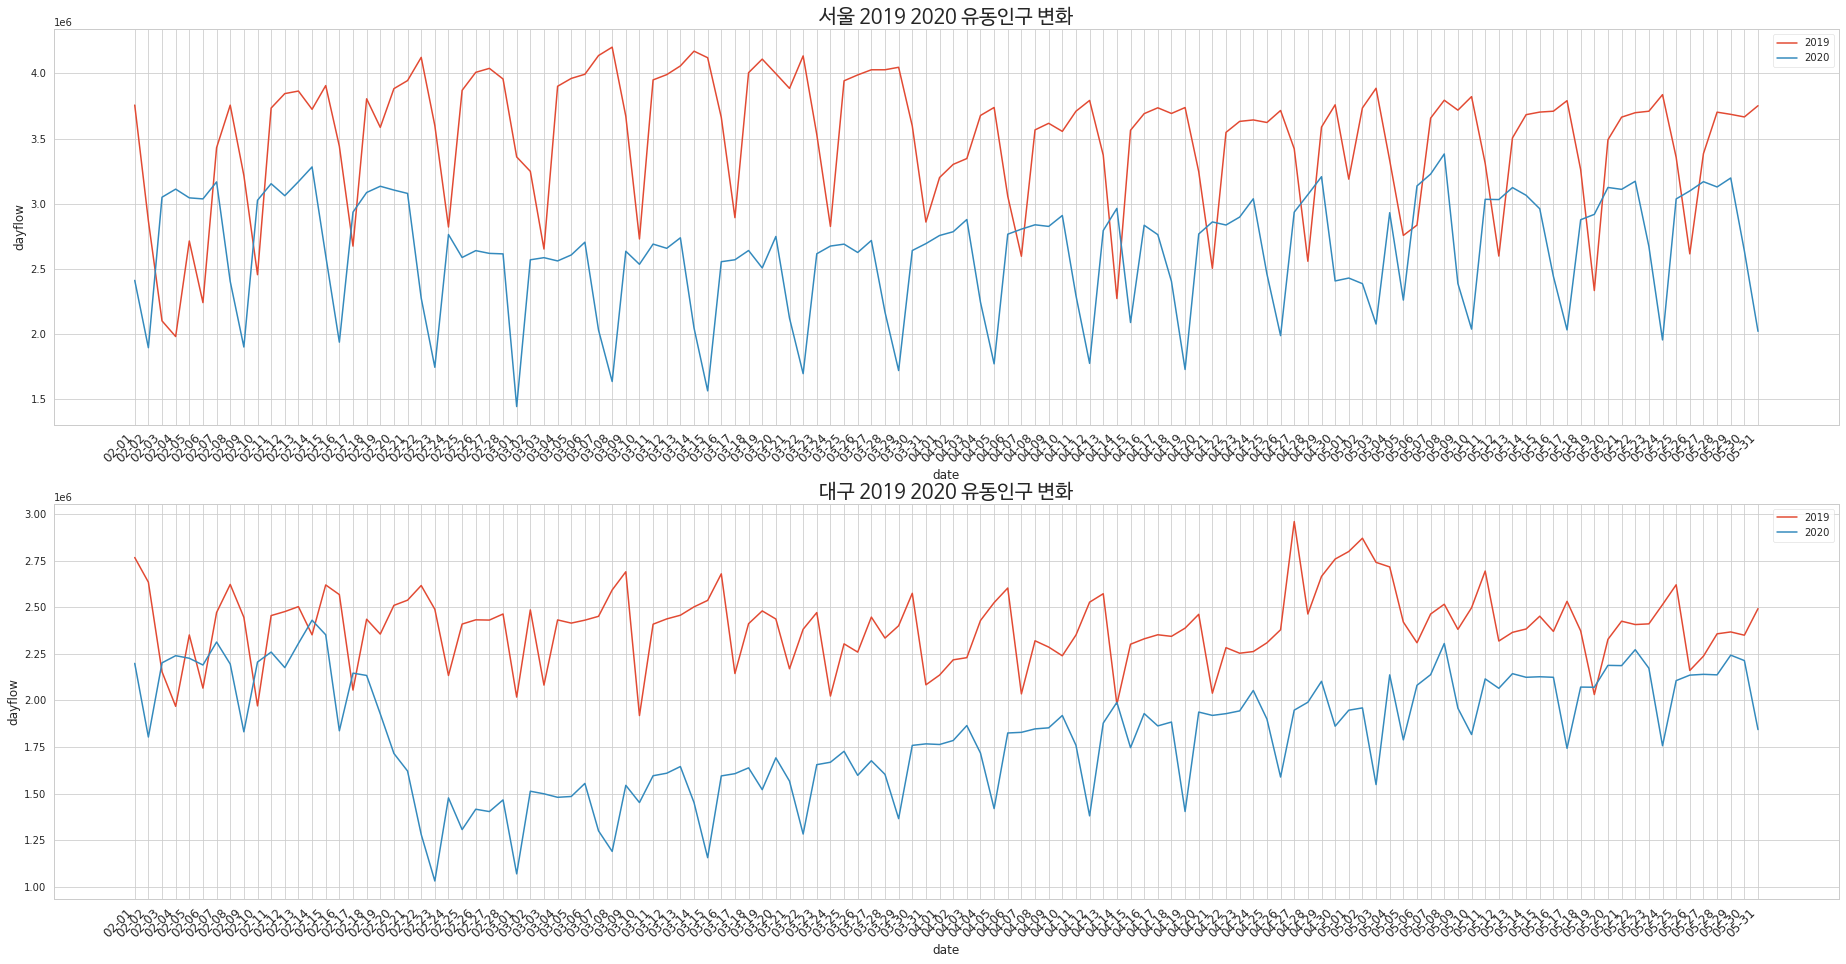

In [230]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(2,1,figsize=(32,16))
sns.lineplot(x=seoul_dayflow[seoul_dayflow.date<'2020']['date'].apply(lambda x : x.strftime('%m-%d')),
             y=seoul_dayflow[seoul_dayflow.date<'2020']['dayflow'],ax=ax[0],label='2019')
sns.lineplot(x=seoul_dayflow[seoul_dayflow.date>='2020']['date'].apply(lambda x : x.strftime('%m-%d')),
             y=seoul_dayflow[seoul_dayflow.date>='2020']['dayflow'],ax=ax[0],label='2020')

sns.lineplot(x=daegu_dayflow[daegu_dayflow.date<'2020']['date'].apply(lambda x : x.strftime('%m-%d')),
             y=daegu_dayflow[daegu_dayflow.date<'2020']['dayflow'],ax=ax[1],label='2019')
sns.lineplot(x=daegu_dayflow[daegu_dayflow.date>='2020']['date'].apply(lambda x : x.strftime('%m-%d')),
             y=daegu_dayflow[daegu_dayflow.date>='2020']['dayflow'],ax=ax[1],label='2020')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right',size=12)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right',size=12)
ax[0].set_title('서울 2019 2020 유동인구 변화',fontproperties=font,size=20)
ax[1].set_title('대구 2019 2020 유동인구 변화',fontproperties=font,size=20)
plt.legend()
plt.show()

In [241]:
home_training_df = pd.read_csv('../input/hometraining-google-trend/multiTimeline.csv')
home_training_df

,카테고리: 모든 카테고리
주,홈트레이닝: (대한민국)
2019-02-03,19
2019-02-10,17
2019-02-17,34
2019-02-24,17
...,...
2020-07-19,65
2020-07-26,42
2020-08-02,48
2020-08-09,47


In [245]:
home_training_df.rename(columns=home_training_df.iloc[0])
home_training_df = home_training_df.iloc[1:,:]

In [246]:
home_training_df.head()

,카테고리: 모든 카테고리
2019-02-03,19
2019-02-10,17
2019-02-17,34
2019-02-24,17
2019-03-03,62


In [247]:
home_training_df.reset_index(inplace=True)

In [251]:
home_training_df.columns = ['date','ind']

In [258]:
home_training_df['date']=pd.to_datetime(home_training_df['date'],format='%Y-%m-%d')

In [264]:
home_training_df['ind']=home_training_df['ind'].apply(pd.to_numeric)

In [280]:
home_training_df[home_training_df['date']=='2020-02-29']

,date,ind


In [272]:
home_training_df[(home_training_df.date>='2020-02-01')&(home_training_df.date<'2020-05-31')]['date'].apply(lambda x : x.strftime('%m-%d'))

52    02-02
53    02-09
54    02-16
55    02-23
56    03-01
57    03-08
58    03-15
59    03-22
60    03-29
61    04-05
62    04-12
63    04-19
64    04-26
65    05-03
66    05-10
67    05-17
68    05-24
Name: date, dtype: object

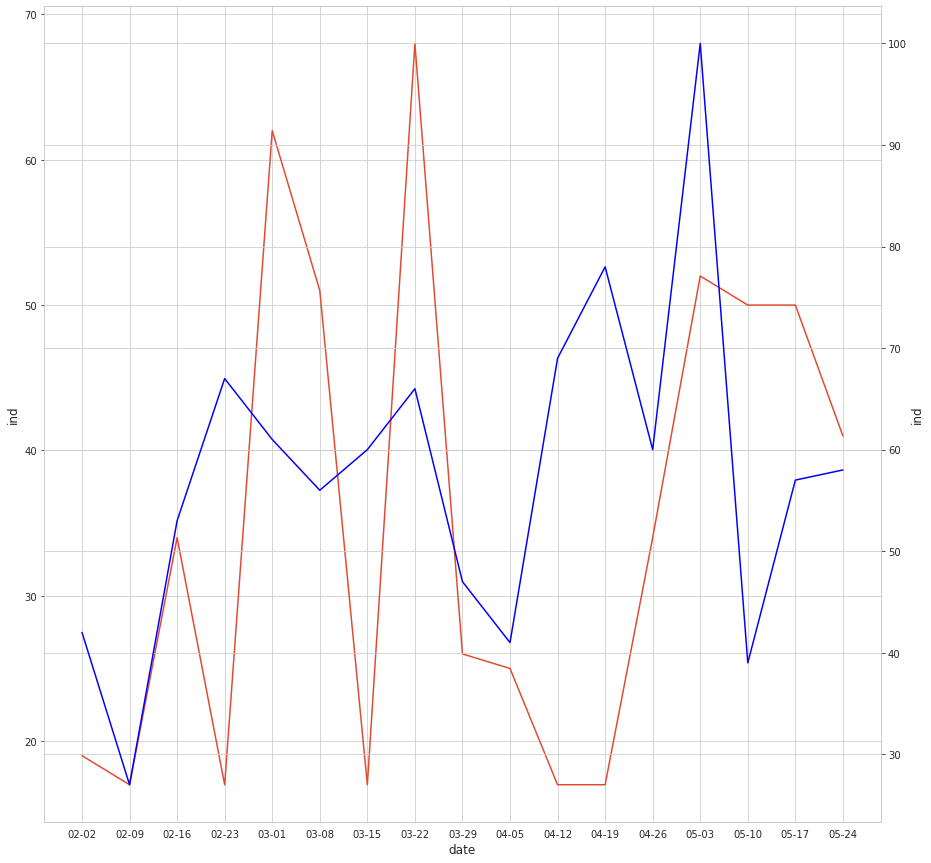

In [285]:
fig,ax=plt.subplots()
sns.lineplot(x=home_training_df[home_training_df.date<='2019-05-31']['date'].apply(lambda x : x.strftime('%m-%d')),
            y=home_training_df[home_training_df.date<='2019-05-31']['ind'],ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=home_training_df[(home_training_df.date>='2020-02-01')&(home_training_df.date<'2020-05-31')]['date'].apply(lambda x : x.strftime('%m-%d')),
            y=home_training_df[(home_training_df.date>='2020-02-01')&((home_training_df.date<'2020-05-31'))]['ind'],ax=ax2,c='b')
plt.xticks(rotation=70)
plt.show()